In [1]:
#starting for lesson 2
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [2]:
#The torch.nn.functional area specifically gives us access to some handy functions that we might not want to write ourselves
import torch.nn as nn
#always pass parameters
import torch.nn.functional as F

In [3]:
#buildig the class
class Net(nn.Module):
    def __init__(self):
        super().__init__() #runnig the initialization 
        #creating four layers
        self.fc1 = nn.Linear(28*28, 64) #fc: fully connected, passing the falttened image, output is 64                                                  
        self.fc2 = nn.Linear(64, 64) #inout is 64 from previous layer and outputs a 64 
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # the last output has 10 classes
        
    #feedforward data
    def forward(self, x): #passing x through all the layers
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         x = self.fc4(x)
#         return x #
        # rectified linear, or relu, activation function. runs on the output
        #to fire the neuron
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) #only passing through
        
        #probability distribution on the final layer, the sum will be 1.        
        #dim=1 is as the outut is 1-d 
        return F.log_softmax(x, dim=1) 
    

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [4]:
#sending some data
X = torch.randn((28,28))
X

tensor([[ 0.0078,  0.0482, -0.8916, -0.3957,  0.4930, -0.7820, -0.7155, -0.4845,
          0.5998, -1.4338,  0.2264, -1.4474,  0.2748,  0.1778, -0.3453,  0.7963,
          0.4202, -1.5508,  1.5715, -0.6190, -1.7879, -3.1897, -0.0172, -0.0849,
         -1.1175,  0.9958, -1.2913, -1.3790],
        [-1.3709,  1.7348,  1.2351, -0.3273,  0.4056, -1.5921,  0.2675,  0.3050,
         -0.1461, -0.8402, -1.0324, -0.4228, -0.7385, -0.1373,  2.3620, -0.7878,
          1.0072, -0.8244,  0.2670, -1.0880, -0.3668,  0.9619,  0.3920, -0.6821,
          0.6075, -0.2814, -0.5039, -0.5733],
        [ 0.2040,  1.5582,  0.1739, -0.9837, -0.7723, -0.1652, -1.8900,  0.7923,
         -0.7715, -1.3415, -0.9316,  1.4467, -0.1679,  2.4510,  0.2840,  1.2731,
          0.7858,  0.2834,  0.8064, -0.2876,  0.9722,  0.9708,  0.8163, -0.2423,
          0.3302, -0.9795,  0.1460, -0.1567],
        [ 0.2256, -0.0404,  0.6193, -0.3355, -0.7262,  0.2327, -0.5786,  1.1355,
          0.2098,  0.8508,  0.4430,  2.0527, -0.2430

In [5]:
#flattenign the data, -1 is to say it can be of any size
X = X.view(-1,28*28)
output = net(X) #passing the data through the network
output #grand_fn is gradient function

tensor([[-2.1931, -2.3601, -2.2421, -2.4054, -2.3651, -2.2545, -2.2849, -2.2620,
         -2.3471, -2.3318]], grad_fn=<LogSoftmaxBackward>)

In [6]:
#lesson 4 starts here -------------------------------------------

import torch.optim as optim

#loss is how wrong we were
loss_function = nn.CrossEntropyLoss()

#the first parameter to change everything
#Adam=Adaptive Momentum
#the second parameter is learning rate. how big of a step to take
#The learning rate dictates the magnitude of changes that the optimizer can make at a time
#decaying learing rate coudl be used, but here it is constant
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3 # 3 full passes over the data

for epoch in range(EPOCHS): 
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.0670, grad_fn=<NllLossBackward>)
tensor(0.1878, grad_fn=<NllLossBackward>)
tensor(0.0018, grad_fn=<NllLossBackward>)


In [7]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.972


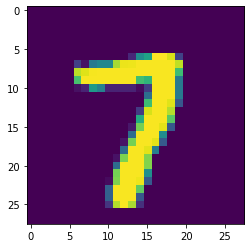

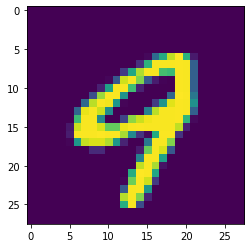

In [8]:
import matplotlib.pyplot as plt
#showing the xth element image
plt.imshow(X[0].view(28,28))
plt.show()
plt.imshow(X[2].view(28,28))
plt.show()

In [9]:
#number in the xth element
print(torch.argmax(net(X[0].view(-1,784))[0]))
print(torch.argmax(net(X[2].view(-1,784))[0]))

tensor(7)
tensor(9)


In [13]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-2.3504e+01, -8.7283e+00, -1.3496e+01, -1.1738e+01, -1.9557e+01,
        -1.7723e+01, -3.4892e+01, -1.8273e-04, -1.7849e+01, -1.1388e+01],
       grad_fn=<SelectBackward>)


In [11]:
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor(7)
